# Indian Election Analysis

India's lower house of Parliament, the Lok Sabha, has 543 seats in total. Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers.

There are more than 700 million voters with more than 800,000 polling stations.

The Lok Sabha election is a very complex affair as it involves a lot of factors. It is this very fact that makes it a perfect topic to analyze.

Currently there are two major parties in India, Bhartiya Janta Party(BJP) and Indian National Congress(INC).

As India is country of diversities, and each region is very different from every other region, there are a lot of regional or state parties having major influences. These parties can either support any of the alliance to make a government or can stay independent.

There are two major alliances, the NDA led by BJP and the UPA led by INC.

## About the data set

### There are two datasets:

#### 1. 2009 Candidate dataset:

The candidate dataset has 15 features namely  'ST_CODE', 'State_name', 'Month', 'Year', 'PC_Number', 'PC_name', 'PC_Type', 'Candidate_Name', 'Candidate_Sex', 'Candidate_Category', 'Candidate_Age', 'Party_Abbreviation', 'Total_Votes_Polled', 'Position','Alliance'.

#### 2. 2009 Electors dataset

The elector dataset consist of 8 features namely 'STATE CODE', 'STATE', 'PC NO', 'PARLIAMENTARY CONSTITUENCY','Total voters', 'Total_Electors', 'TOT_CONTESTANT', 'POLL PERCENTAGE'.

## Loading necessary Libraries and dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read both the datasets
electors_2009 = pd.read_csv('../data/LS2009Electors.csv')
# quick check for any null values
electors_2009.isnull().sum()

STATE CODE                    0
STATE                         0
PC NO                         0
PARLIAMENTARY CONSTITUENCY    0
Total voters                  0
Total_Electors                0
TOT_CONTESTANT                0
POLL PERCENTAGE               0
dtype: int64

In [22]:
candidate_2009 = pd.read_csv("../data/candidate09.csv")
# see the shape 
candidate_2009.shape

(8070, 15)

## Task 1 : Plot a bar chart to compare the number of male and female candidates in the election

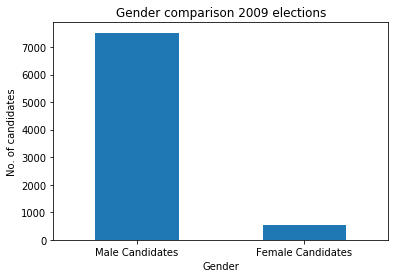

In [23]:
# Finding the value counts of both the genders
# Plotting a bar graph
candidate_2009.Candidate_Sex.value_counts().plot(kind='bar',rot=0, title='Gender comparison 2009 elections')
plt.xticks(ticks=(0,1), labels=('Male Candidates', 'Female Candidates'))
plt.ylabel('No. of candidates')
plt.xlabel('Gender')
plt.show()

### Insight: Female candidates are significantly less. 

## Task 2 : Plot a histogram of the age of all the candidates as well as of the winner amongst them. Compare them and note an observation

In [24]:
# Selecting the subset of the data with winner candidates
# looking at their summary statistics
pd.DataFrame({'winner':candidate_2009[candidate_2009.Position == 1].Candidate_Age.describe(),
              'all':candidate_2009.Candidate_Age.describe()})




,winner,all
count,541.000000,8070.000000
mean,53.059150,45.837673
std,11.215739,11.831528
min,26.000000,25.000000
25%,45.000000,37.000000
50%,53.000000,45.000000
75%,60.000000,54.000000
max,88.000000,99.000000


### Meidan age is 53 for winners whereas it is 45 for all candidates, indicating winners are bit older (or experienced)

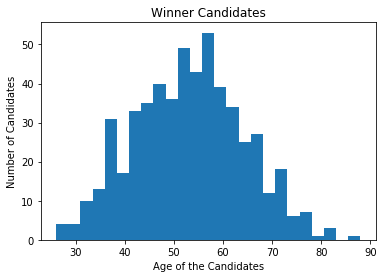

In [25]:
# Lets plot the winners
winner = candidate_2009[candidate_2009.Position == 1].Candidate_Age
winner.plot.hist(bins=25, title='Winner Candidates')
plt.xlabel('Age of the Candidates')
plt.ylabel('Number of Candidates')
plt.show()

### Seems like Age is normally distribution for winning candidates

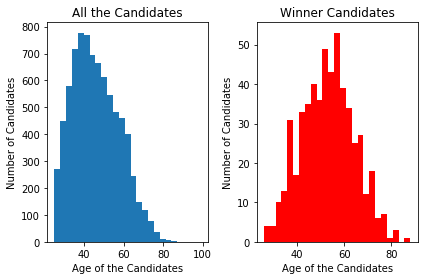

In [26]:
# Lets plot them side by side

# Histogram of the age of all the candidates
fig,ax = plt.subplots(nrows=1,ncols=2,tight_layout = True)

ax[0].hist(list(candidate_2009.Candidate_Age),bins = 25)
ax[0].set_xlabel('Age of the Candidates')
ax[0].set_ylabel('Number of Candidates')
ax[0].set_title('All the Candidates')

ax[1].hist(list(winner),bins = 25,color = 'red')
ax[1].set_xlabel('Age of the Candidates')
ax[1].set_ylabel('Number of Candidates')
ax[1].set_title('Winner Candidates')
plt.show()

### Insight: Most of the candidates are of the in the age bracket of 40 - 50 but the age bracket of winner candidates is between 50-70.

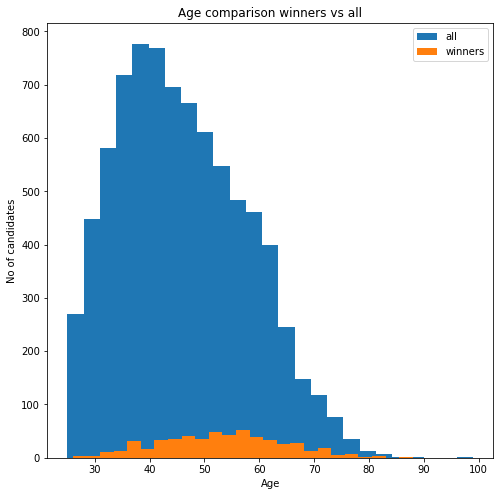

In [27]:
# How about we overlap these histogram to see the proportions
bins =25
plt.figure(figsize=(8,8))

candidate_2009.Candidate_Age.plot.hist(bins=bins,label='all')
candidate_2009[candidate_2009.Position == 1].Candidate_Age.plot.hist(bins=bins,label='winners')
plt.legend(loc='upper right')
plt.title('Age comparison winners vs all')
plt.xlabel('Age')
plt.ylabel('No of candidates')
plt.show()

## Insight: Mostly older candidates are the winners (50-65), but the proportion of candidates participating vs winning is drastically different, indicating only a handful of people get selected. It would be interesting to see which parties have the highest conversion rate.

## Task 3 : Plot a bar graph to get the vote shares of different parties

In [28]:
# Lets see the features required for this plot
candidate_2009[['Party_Abbreviation', 'Total_Votes_Polled']]


,Party_Abbreviation,Total_Votes_Polled
0,TDP,372268.0
1,INC,257181.0
2,PRAP,112930.0
3,BJP,57931.0
4,BSP,16471.0
...,...,...
8065,IND,422.0
8066,IND,378.0
8067,IND,378.0
8068,IND,375.0


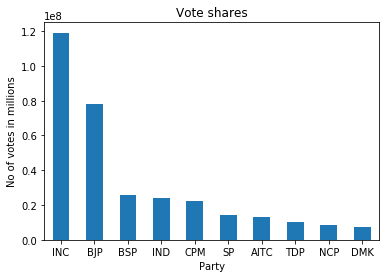

In [29]:
# Group the dataframe by 'Party_Abbreviation' and sum the 'Total _Votes_Polled'
# Plot the vote share of top 10 parties
candidate_2009.groupby('Party_Abbreviation')['Total_Votes_Polled'].\
        sum().sort_values(ascending=False)[:10].\
        plot.bar(rot=0, title='Vote shares')
plt.ylabel('No of votes in millions')
plt.xlabel('Party')
plt.show()

### Insight: The vote share of Indian National Congres(INC) is highest followed by the Bhartiya Janta Party(BJP). The intresting observation here is the Bahujan Samaj Party(BSP) despite being a regional party has the third highest number of vote share. Indicating the state of UP is deciding factor.

## Task 4 : Plot a barplot to compare the mean poll percentage of all the states

In [30]:
## Adapted from https://stackoverflow.com/a/56780852/8210613 to show values on the bars
def show_values_on_bars(axs, h_v="v", xspace=0.4, yspace=0.4, unit='%'):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = str(round(float(p.get_height()),2)) + unit
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(xspace)
                _y = p.get_y() + p.get_height() + float(yspace)
                value = str(round(float(p.get_width()),2)) + unit
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

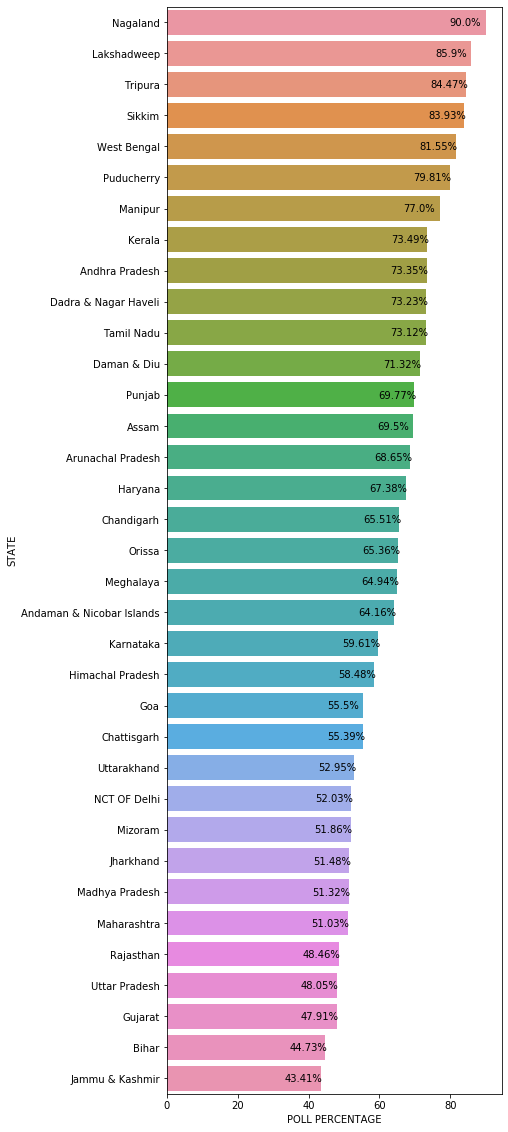

In [31]:
import seaborn as sns

# Mean POLL PERCENTAGE of all the STATES
polls = electors_2009.groupby('STATE')['POLL PERCENTAGE'].mean().sort_values(ascending=False)
# Generating a bar plot
plt.figure(figsize=(6,20))
sns_t = sns.barplot(polls,polls.index)
show_values_on_bars(sns_t, "h", -10.2,-0.3 ,'%')

### Insigt: Top 3 (out of top 5) are Northeastern states. UP is voting less than 50%, still their regional parties BSP and SP are among top-six most voted parties, imagine what would happen if more no. of people in UP participate in elections.

## Task 5 : Plot a bar plot to compare the seats won by different parties in Uttar Pradesh

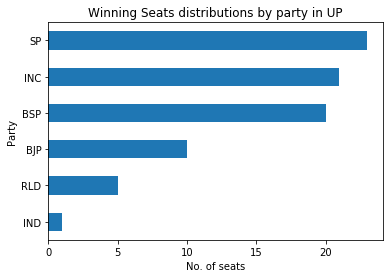

In [32]:
# Find winners in UP and count the party affiliation
ax = candidate_2009[ (candidate_2009.Position == 1 ) & ( candidate_2009.State_name == 'Uttar Pradesh') ].\
    Party_Abbreviation.value_counts().plot.barh(title='Winning Seats distributions by party in UP')

# to show in descending order
ax.invert_yaxis()

plt.xlabel('No. of seats')
plt.ylabel('Party')

# [optional] to save the figure to be included in external reports
plt.savefig('up.png')

### Insight: Regional parties have major influencies, the highest number of seats won in UP are by Samajwadi Party(SP). Also Bahujan Samaj Party(BSP) is trailing behind INC only by a few seats.

## Task 6 : Plot a stacked bar chart to compare the number of seats won by different `Alliances` in Gujarat, Madhya Pradesh and Maharashtra. 

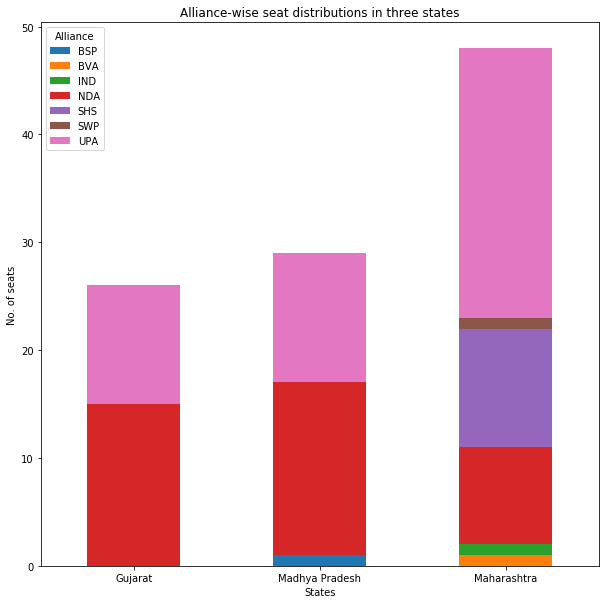

In [33]:
# Subset the the dataset for the states of Gujarat, Maharashtra and Madhya Pradesh
states_list = ['Gujarat', 'Madhya Pradesh', 'Maharashtra']
states = candidate_2009[candidate_2009.State_name.isin(states_list)][candidate_2009.Position ==1]

# Stacked bar plot
states.groupby(['State_name', 'Alliance']).size().unstack().\
        plot.bar(stacked=True,figsize=(10,10),rot=0, 
                title='Alliance-wise seat distributions in three states')
plt.xlabel('States')
plt.ylabel('No. of seats')
plt.show()


### Insight: Maharashtra is dynamic state with various parties winning seats in the election with UPA getting the highest seats followed by NDA.

## Task 7 : Plot a grouped bar chart to compare the number of winner candidates on the basis of their caste in the states of Andhra Pradesh, Kerala, Tamil Nadu and Karnataka

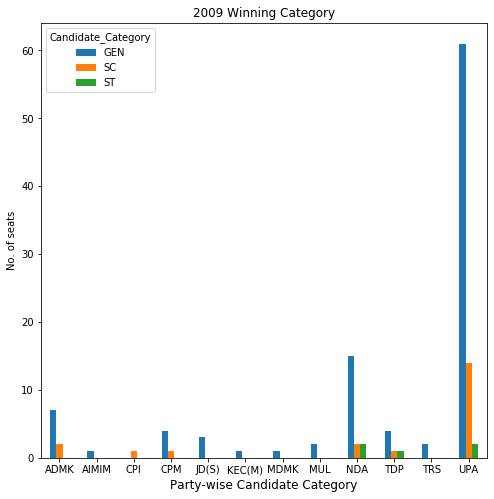

In [34]:
# Subset the data with the winner of each constituency of the mentioned states
states_list = ['Andhra Pradesh', 'Kerala', 'Tamil Nadu', 'Karnataka']
states = candidate_2009[candidate_2009.State_name.isin(states_list)][candidate_2009.Position ==1]

# Plotting the grouped bar
states.groupby(['Alliance', 'Candidate_Category']).size().unstack().\
        plot.bar(figsize=(8,8),rot=0, title ="2009 Winning Category")
plt.xlabel("Party-wise Candidate Category", fontsize=12)
plt.ylabel("No. of seats")
plt.show()


### Insight: Most of the winner candidates are from general category with UPA having the highest number of SC candidates.

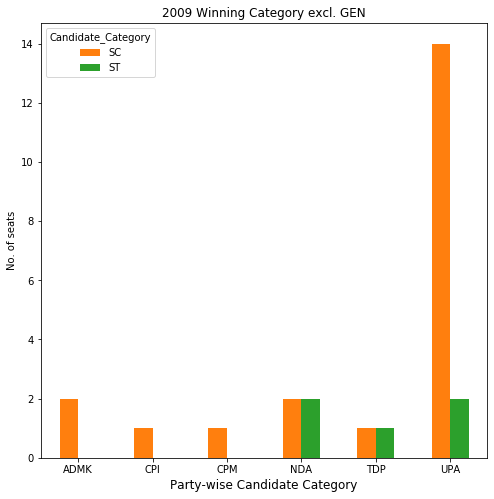

In [35]:
# But if we remove GEN category and only focus on SC, ST we might see a different picture

# Plotting the grouped bar
states[states.Candidate_Category!='GEN'].\
        groupby(['Alliance', 'Candidate_Category']).size().unstack().\
        plot.bar(figsize=(8,8),rot=0, title ="2009 Winning Category excl. GEN",
                 color=['tab:orange','tab:green'])
plt.xlabel("Party-wise Candidate Category", fontsize=12)
plt.ylabel("No. of seats")
plt.show()

### Insight: SC and ST are under-represented in the lower house of the parliament.

## Task 8 : Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000

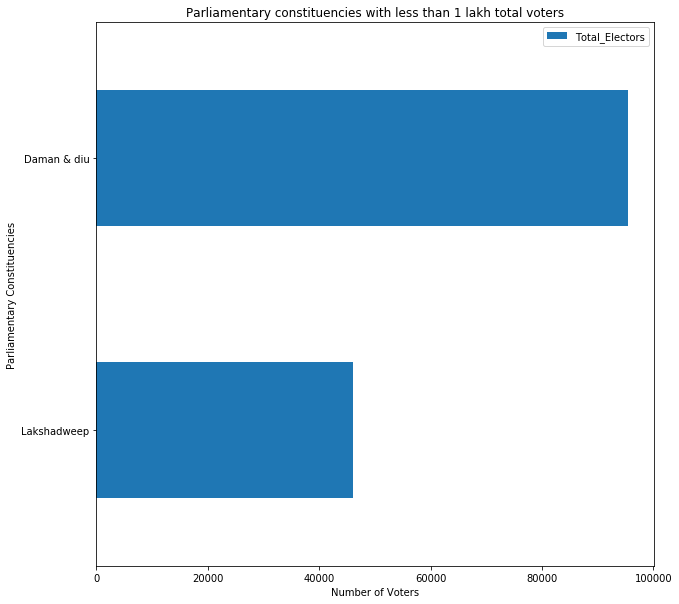

In [36]:
# Constituency with less than 100000 voters
# Plot a horizontal bar graph to compare constituencies with less than 100000 voters
electors_2009[electors_2009.Total_Electors < 100000].\
    sort_values(ascending=True,by='Total_Electors').\
    plot.barh(x='PARLIAMENTARY CONSTITUENCY',y='Total_Electors',
              figsize=(10,10), 
              title="Parliamentary constituencies with less than 1 lakh total voters")

plt.xlabel('Number of Voters')
plt.ylabel('Parliamentary Constituencies')
plt.show()


### Insight: Only two constituencies which have electors strength less than one lakh.

## Task 9: Plot a pie chart with the top 10 parties with majority seats in the elections

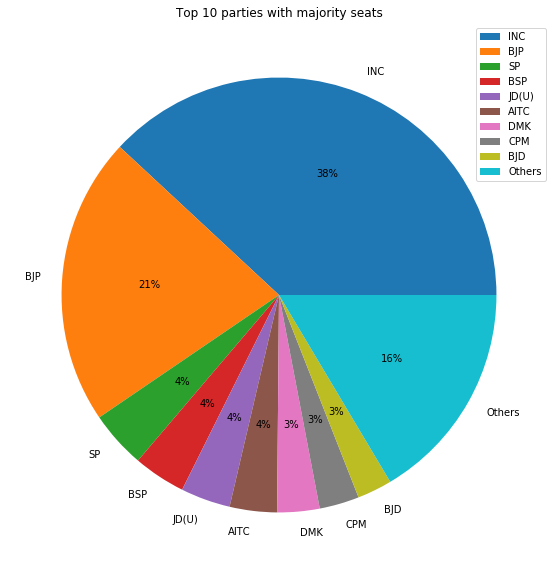

In [48]:
# Candidates with 1st position in their respective constituiency
all_winners = candidate_2009[candidate_2009.Position ==1].Party_Abbreviation.value_counts()
top_10_winners = all_winners[:9] 
# count of other regional parties
top_10_winners['Others'] = all_winners.sum() - top_10_winners.sum()
# Pie chart
top_10_winners.plot.pie(autopct='%.f%%', 
                        figsize=(10,10), 
                        title='Top 10 parties with majority seats')
plt.legend(loc='upper right')
plt.ylabel('')
plt.show()

### Insight: INC have won almost 38% of the total seats followed by BJP with 21% seats.

## Task 10 : Plot a pie diagram for top 10 states with most number of seats

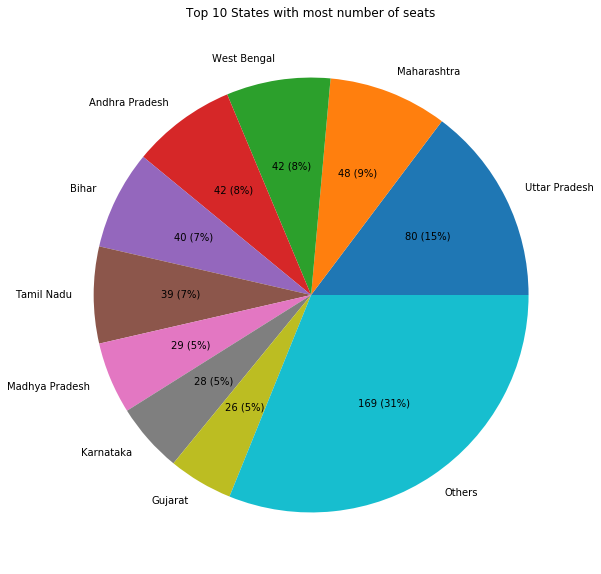

In [47]:
# Top 9 states with maximum number of seats
top_10_seats = electors_2009.STATE.value_counts()[:9]

# Sum of other states
top_10_seats['Others'] = electors_2009.STATE.value_counts().sum() - top_10_seats.sum()

# Function to convert percentages into actual values
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{val:d} ({pct:.0f}%)'.format(val=val,pct=pct)
    return my_format

# PLotting the pie chart
top_10_seats.plot.pie(autopct=autopct_format(top_10_seats.values), 
                      figsize=(10,10), 
                      title="Top 10 States with most number of seats")
plt.ylabel('')
plt.show()

### Insight: Uttar Pradesh has the highest number of seats (80 or 15%) followed by Maharashtra (48 or 9%).

